In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pylab as plt

In [2]:
#import the csv file to extract data
df=pd.read_csv('../../Datasets/HPTimeSeries.csv') #index_col='DATE',parse_dates=True this is to ensure that panda understand that the 'DATE' is not string & it's a date value.
#df=df.dropna() #drop null values
print('Shape of data',df.shape)
df.head()

Shape of data (384, 4)


,year,month,day,Production
0,2022,4,1,NaN
1,2022,4,2,6.4
2,2022,4,3,12.8
3,2022,4,4,30.0
4,2022,4,5,37.2


In [3]:
# Remove duplicates
df = df.drop_duplicates()
print('Shape of data',df.shape)

Shape of data (384, 4)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 383
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        384 non-null    int64  
 1   month       384 non-null    int64  
 2   day         384 non-null    int64  
 3   Production  346 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 15.0 KB


In [5]:
print(df.isnull().sum())

year           0
month          0
day            0
Production    38
dtype: int64


In [6]:
print(df["Production"].fillna(value=df["Production"].mean(), inplace=True))

None


In [7]:
df.head()

,year,month,day,Production
0,2022,4,1,51.333092
1,2022,4,2,6.400000
2,2022,4,3,12.800000
3,2022,4,4,30.000000
4,2022,4,5,37.200000


In [8]:
df["Production"] = df["Production"].round(1)
df.head()

,year,month,day,Production
0,2022,4,1,51.3
1,2022,4,2,6.4
2,2022,4,3,12.8
3,2022,4,4,30.0
4,2022,4,5,37.2


In [9]:
#df['Date'] = pd.to_datetime(df[['year', 'month', 'day']],errors='coerce')
#df.dropna(subset=['Date'], inplace=True)
#df = df.set_index(['Date'])

In [10]:
df.shape

(384, 4)

In [11]:
df.head()

,year,month,day,Production
0,2022,4,1,51.3
1,2022,4,2,6.4
2,2022,4,3,12.8
3,2022,4,4,30.0
4,2022,4,5,37.2


In [12]:
#df = df.drop(['year', 'month', 'day'], axis=1)


In [13]:
df.count

<bound method DataFrame.count of      year  month  day  Production
0    2022      4    1        51.3
1    2022      4    2         6.4
2    2022      4    3        12.8
3    2022      4    4        30.0
4    2022      4    5        37.2
..    ...    ...  ...         ...
379  2023      4   15         7.4
380  2023      4   16        14.8
381  2023      4   17         5.4
382  2023      4   18         2.6
383  2023      4   19         1.5

[384 rows x 4 columns]>

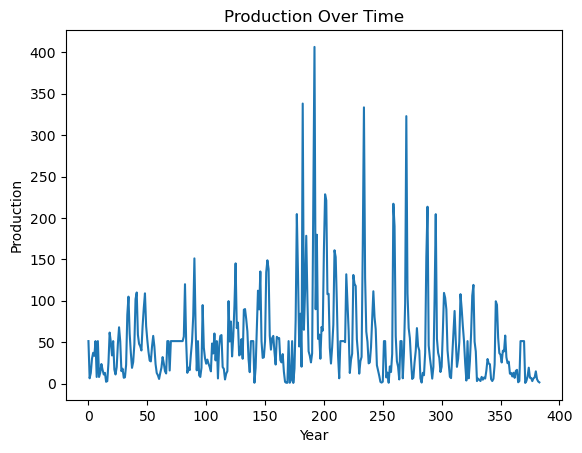

In [14]:
plt.plot(df.Production)
plt.title('Production Over Time')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()

Now we have to test whether the data set is stationary or not. Use Augmented Dick-fuller (ADF) for that.

* null hypotheis : the series is non-stationary
* alternative hypothesis : the series is stationary

In [15]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.Production.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.597982
p-value: 0.005800


Accept H1

Will check the seasonal component to identify whether there is seasonality in the time series.

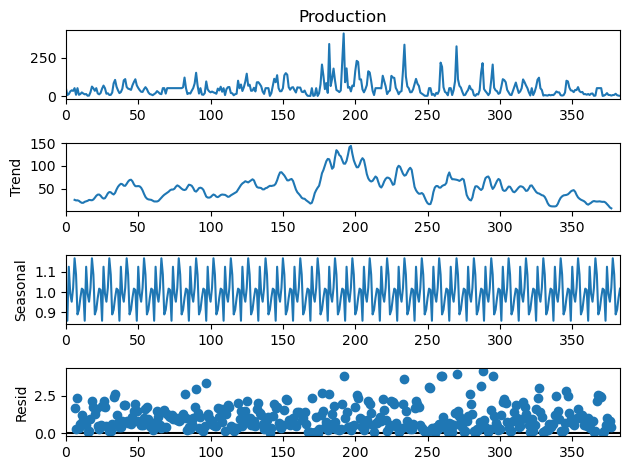

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition using moving averages
decomposition = seasonal_decompose(df.Production, model='multiplicative', period=12)

# Plot the seasonal decomposition
fig = decomposition.plot()

Since the p-value & ADF statistic value are less than 0.05, the null hypothesis can be rejected at a 0.95 significant level. So at a significant level of 95%, we can say that the time series is stationary. Hence not need to differentiate the series. 

Next we have to find the P, D, & M values. (order of AR, I, & MA terms). We can do that using the Partial Autocorrelation (PACF) plot & ACF plot as follows. But we can easily take them using 'autoarmia'.

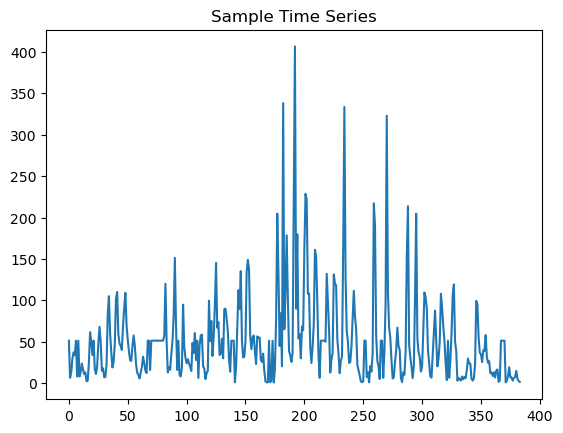

c:\Users\yasas\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


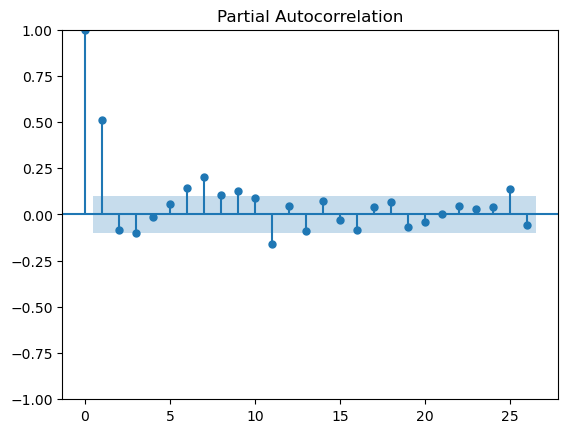

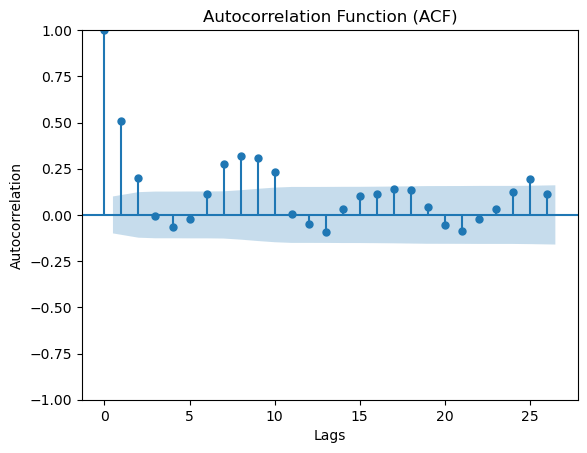

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# plot the time series
plt.plot(df.Production)
plt.title('Sample Time Series')
plt.show()

# plot PACF to determine AR(p) term
plot_pacf(df.Production,)

# plot ACF to determine MA(q) term
plot_acf(df.Production)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

In [18]:
#!pip install pmdarima

In [19]:
from pmdarima.arima import auto_arima

# Perform grid search
model = auto_arima(df['Production'], seasonal=True, m=5, suppress_warnings=True)

# Print the best parameters found
print("Best SARIMA parameters:", model.order, model.seasonal_order)

Best SARIMA parameters: (0, 1, 3) (2, 0, 0, 5)


In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
import pickle

df['Date'] = pd.to_datetime(df[['year', 'month', 'day']],errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df = df.set_index(['Date'])
df = df.drop(['year', 'month', 'day'], axis=1)

# Split the data into train and test sets
train, test = train_test_split(df['Production'], test_size=0.2, shuffle=False)

c:\Users\yasas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\yasas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\yasas\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Date'>

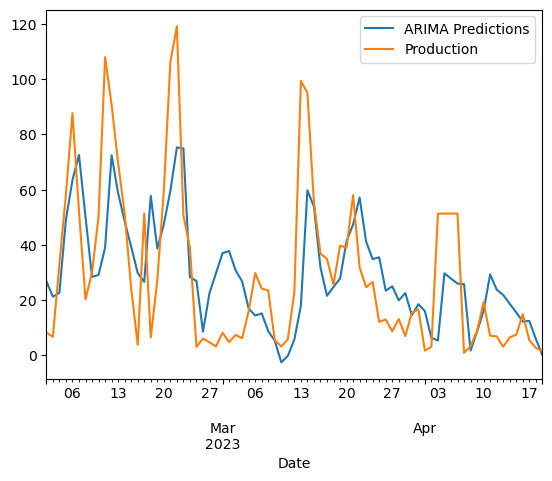

In [21]:
# Fit the SARIMA model
model = SARIMAX(df['Production'], order=(3,0,7), seasonal_order=(2, 0, 0, 5))
#model = SARIMAX(train, order=(1, 2, 2), seasonal_order=(2, 0, 0, 12))
fitted_model = model.fit()

# Save the sarima model to a pickle file
#with open('Money_printing.pkl', 'wb') as file:
 #   pickle.dump(fitted_model, file)


# Generate predictions
start = len(train)
end = len(train) + len(test) - 1
pred = fitted_model.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')

# Plot the predictions and actual values
pred.plot(legend=True)
test.plot(legend=True)

In [22]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Production   No. Observations:                  383
Model:             SARIMAX(3, 0, 7)x(2, 0, [], 5)   Log Likelihood               -1997.015
Date:                            Wed, 01 Nov 2023   AIC                           4020.029
Time:                                    05:29:55   BIC                           4071.354
Sample:                                         0   HQIC                          4040.389
                                            - 383                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4018      0.463      0.867      0.386      -0.506       1.310
ar.L2          0.6221      0.576      1.080      0.280      -0.506       1.751
ar.L3         -0.0581      0.294     -0.198      0.843      -0.634       0.518
ma.L1          0.0976      0.465      0.210      0.834      -0.814       1.009
ma.L2         -0.6108      0.403     -1.516      0.130      -1.401       0.179
ma.L3         -0.2771      0.150     -1.848      0.065      -0.571       0.017
ma.L4         -0.1287      0.115     -1.123      0.262      -0.353       0.096
ma.L5          0.5684      0.196      2.904      0.004       0.185       0.952
ma.L6          0.1815      0.269      0.675      0.500      -0.346       0.708
ma.L7         -0.2161      0.228     -0.948      0.343      -0.663       0.231
ar.S.L5       -0.5822      0.170     -3.415      0.001      -0.916      -0.248
ar.S.L10      -0.0251      0.057     -0.443      0.658      -0.136       0.086
sigma2      1849.7003     73.520     25.159      0.000    1705.604    1993.797
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2655.17
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.84   Skew:                             2.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

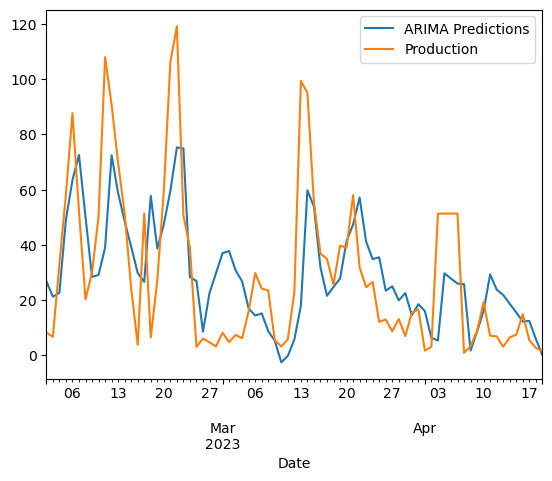

In [23]:
start=len(train)
end=len(train)+len(test)-1
pred=fitted_model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test.plot(legend=True)

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test.mean()
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

22.68219385346096


In [26]:
pip install prophet

     ---------------------------------------- 13.3/13.3 MB 2.2 MB/s eta 0:00:00
  Using cached holidays-0.35-py3-none-any.whl (800 kB)
     ---------------------------------------- 93.0/93.0 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [28]:
from prophet import Prophet
m = Prophet()

In [50]:
df=pd.read_csv('../../Datasets/HPTimeSeries.csv')
print(df["Production"].fillna(value=df["Production"].mean(), inplace=True))
df["Production"] = df["Production"].round(1)
df.head()

None


,year,month,day,Production
0,2022,4,1,51.3
1,2022,4,2,6.4
2,2022,4,3,12.8
3,2022,4,4,30.0
4,2022,4,5,37.2


In [51]:
df['Date'] = pd.to_datetime(df[['year', 'month', 'day']],errors='coerce')
df.dropna(subset=['Date'], inplace=True)
#df = df.set_index(['Date'])
df = df.drop(['year', 'month', 'day'], axis=1)

In [52]:
train, test = train_test_split(df, test_size=0.2, shuffle=False)

In [53]:
m.fit((train[["Date", "Production"] ].rename(columns={"Date": "ds", "Production": "y"})))

Exception: Prophet object can only be fit once. Instantiate a new object.

In [36]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
743,2024-04-14
744,2024-04-15
745,2024-04-16
746,2024-04-17
747,2024-04-18


In [37]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
743,2024-04-14,-84.831713,-162.400422,-10.367005
744,2024-04-15,-78.628716,-150.570729,-3.844418
745,2024-04-16,-79.559871,-153.498704,-6.889529
746,2024-04-17,-82.033945,-148.791421,-4.946547
747,2024-04-18,-79.954652,-153.728120,-4.584098


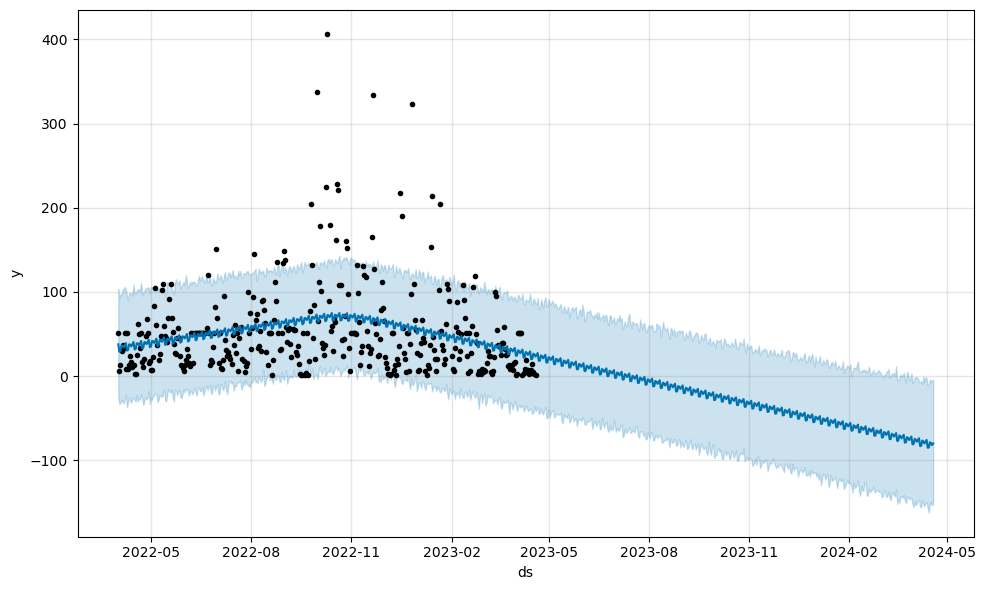

In [38]:
fig1 = m.plot(forecast)

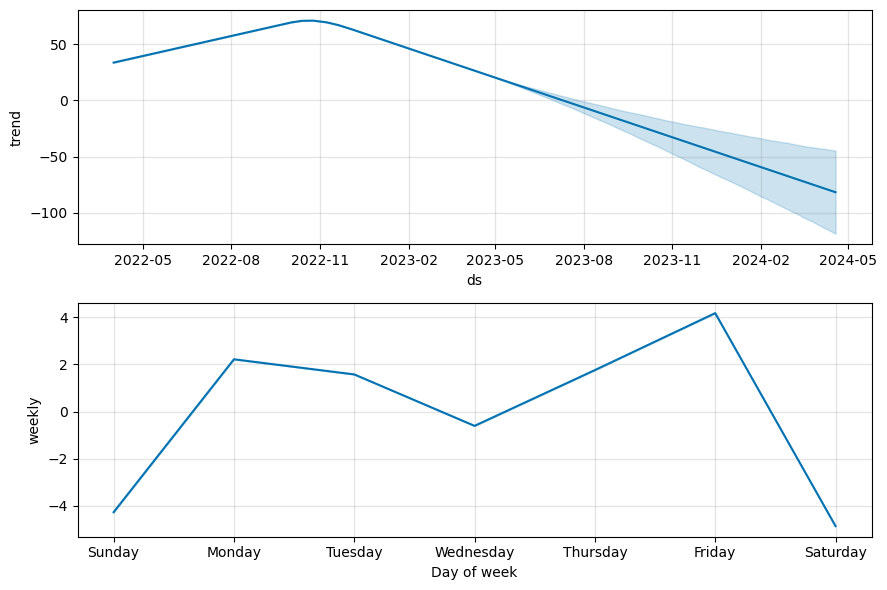

In [39]:
fig2 = m.plot_components(forecast)

c:\Users\yasas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:>

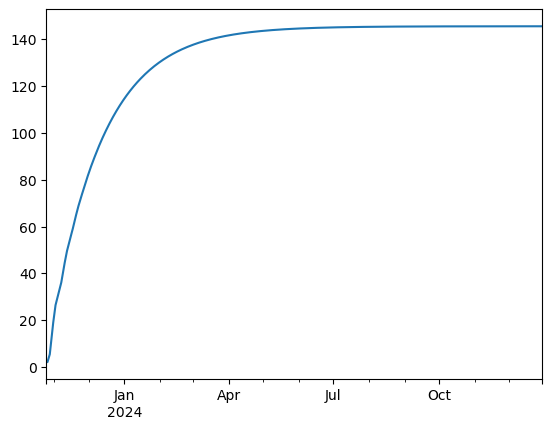

In [183]:
import pandas as pd
import pickle

start_date = '2023-10-25'
end_date = '2024-12-30'

# Generate monthly date range
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Predict future values
predictions_future = fitted_model.get_forecast(steps=len(date_range))
predicted_values_diff = predictions_future.predicted_mean

# Reverse the differencing process
base_value = df['Production'].iloc[-1]  # Replace 'diff' with the appropriate column name
predicted_values_cumsum = predicted_values_diff.cumsum()
predicted_values_actual = base_value + predicted_values_cumsum

# Set the index as the date range
predicted_values_actual.index = date_range

# Save the predictions to a CSV file
predicted_values_actual.to_csv('Sarima_HP1_6year_predic.csv')

# Plot the predicted values
predicted_values_actual.plot()

In [151]:
from datetime import datetime
date1 = datetime.strptime('2023-11-30', '%Y-%m-%d').date()
d1= str(date1)
d1

'2023-11-30'

In [152]:
predicted_values_actual[d1]

81.46457385778456

In [172]:
df1=pd.read_csv('Sarima_HP1_6year_predic.csv', index_col=0) 
#df=df.dropna() #drop null values
print('Shape of data',df1.shape)
df1.head()

Shape of data (37, 1)


,predicted_mean
2023-10-25,2.110439
2023-10-26,2.218916
2023-10-27,3.813155
2023-10-28,5.528647
2023-10-29,10.092194


In [173]:
df1.index

Index(['2023-10-25', '2023-10-26', '2023-10-27', '2023-10-28', '2023-10-29',
       '2023-10-30', '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03',
       '2023-11-04', '2023-11-05', '2023-11-06', '2023-11-07', '2023-11-08',
       '2023-11-09', '2023-11-10', '2023-11-11', '2023-11-12', '2023-11-13',
       '2023-11-14', '2023-11-15', '2023-11-16', '2023-11-17', '2023-11-18',
       '2023-11-19', '2023-11-20', '2023-11-21', '2023-11-22', '2023-11-23',
       '2023-11-24', '2023-11-25', '2023-11-26', '2023-11-27', '2023-11-28',
       '2023-11-29', '2023-11-30'],
      dtype='object')

In [159]:
#df1.rename( columns={'Unnamed: 0':'Date'}, inplace=True )

In [179]:
pred = df1.loc[d1]

In [180]:
np.array(pred)

array([81.46457386])

In [184]:
import pickle
loadModel = pickle.dump(fitted_model, open('ArimaHTP2.pkl','wb'))